#  Logistic Regression — From Scratch 

In this notebook, we implement **Logistic Regression** step-by-step using **NumPy only**, without using scikit-learn.

### We will:
- Generate a binary classification dataset  
- Implement the Sigmoid function  
- Define the hypothesis  
- Implement the Binary Cross-Entropy cost function  
- Compute gradients  
- Apply Gradient Descent  
- Train the model  
- Visualize the decision boundary  
- Evaluate performance  


##  What is Logistic Regression?

Logistic Regression is a **binary classification** algorithm.  
Instead of predicting a continuous value, it predicts a **probability** between 0 and 1.

The hypothesis is:

$$
\hat{y} = \sigma(\theta^T X)
$$

Where the sigmoid function $(\sigma(z) )$ is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The model outputs:

- $( \hat{y} \approx 1 )$ → positive class  
- $( \hat{y} \approx 0 )$ → negative class  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## 1. Generate Binary Dataset

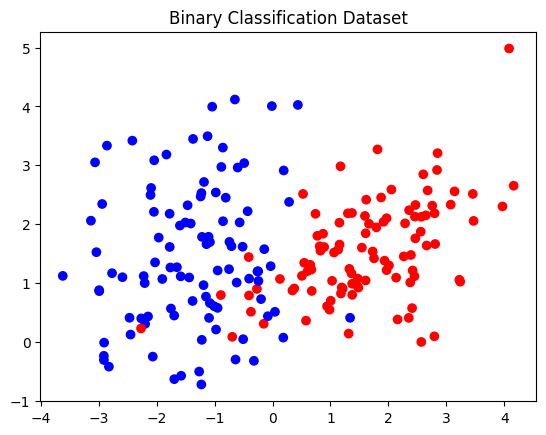

In [9]:
np.random.seed(42)

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5
)

y = y.reshape(-1, 1)

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="bwr")
plt.title("Binary Classification Dataset")
plt.show()

## 2. Logistic Regression Functions

In [8]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))


def predict(X, theta):
    """Return predicted probabilities."""
    return sigmoid(X @ theta)


def compute_cost(X, y, theta):
    """Binary cross-entropy cost function."""
    m = len(y)
    predictions = predict(X, theta)

    cost = (-1/m) * np.sum(
        y * np.log(predictions + 1e-8) +
        (1 - y) * np.log(1 - predictions + 1e-8)
    )
    return cost


def gradient_descent(X, y, theta, lr=0.1, epochs=2000):
    """Optimize theta using gradient descent."""
    m = len(y)
    cost_history = []

    for i in range(epochs):
        predictions = predict(X, theta)
        gradients = (1/m) * (X.T @ (predictions - y))
        theta -= lr * gradients

        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

## 3. Train the Model

In [5]:
theta_init = np.random.randn(3, 1)
theta_final, cost_history = gradient_descent(X_b, y, theta_init)

theta_final

array([[ 0.73764207],
       [ 2.76403479],
       [-0.66768603]])

## 4. Plot Cost Curve

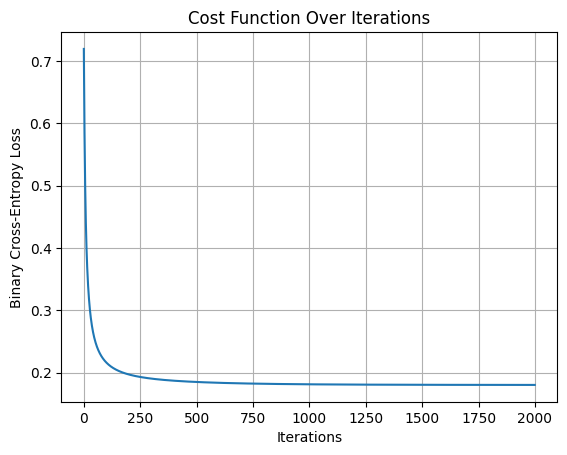

In [7]:
plt.plot(cost_history)
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

## 5. Decision Boundary

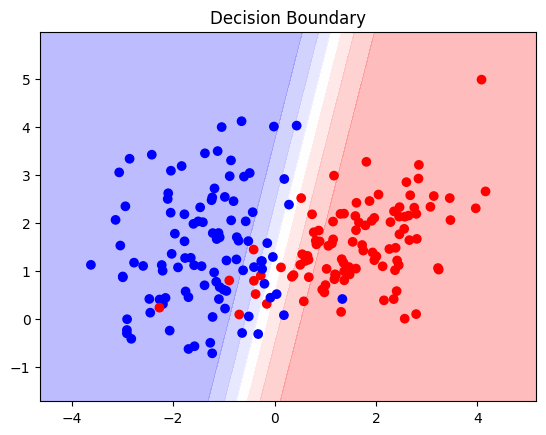

In [10]:
# Create grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
probs = predict(grid, theta_final).reshape(xx.shape)

plt.contourf(xx, yy, probs, cmap="bwr", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="bwr")
plt.title("Decision Boundary")
plt.show()


##  Performance Evaluation and Decision Boundary Analysis

- The Binary Cross-Entropy loss decreases smoothly across iterations, indicating that **Gradient Descent converged properly**.

- The learned decision boundary successfully separates the two classes:
  - Points on the right side of the boundary are classified as **positive (1)**  
  - Points on the left side are classified as **negative (0)**  

- The transition region (the white band) represents the **probability threshold around 0.5**, where the model is most uncertain.

- The boundary is linear, which is consistent with the theoretical form of Logistic Regression:

$$
\hat{y} = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)
$$

- Overall, the model demonstrates:
  - Good convergence  
  - Stable optimization  
  - A clear, interpretable linear separator  
